# K-Means Clustering Project 

# Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/Users/adam/Downloads/College_Data', index_col=0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [14]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# EDA - Scatterplot of Grad.Rate vs Room.Board with a hue using the Private Column

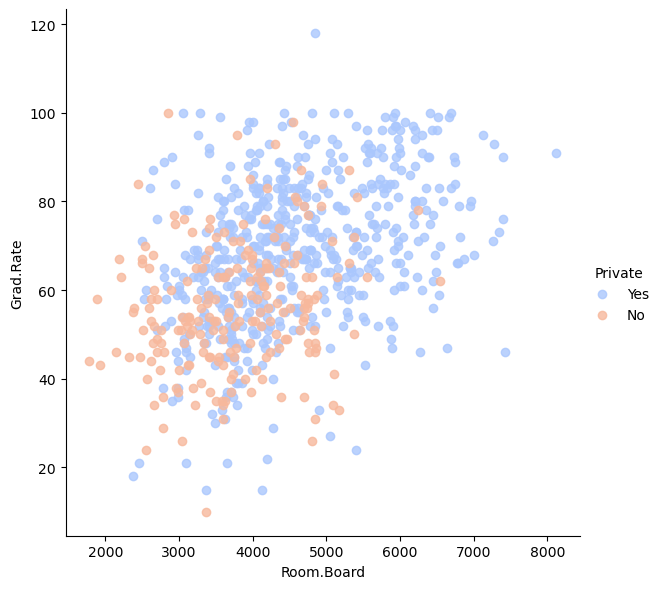

In [26]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', fit_reg=False,
          palette='coolwarm',height=6, aspect=1)

#### Scatterplot of F.Undergrad vs Outstate

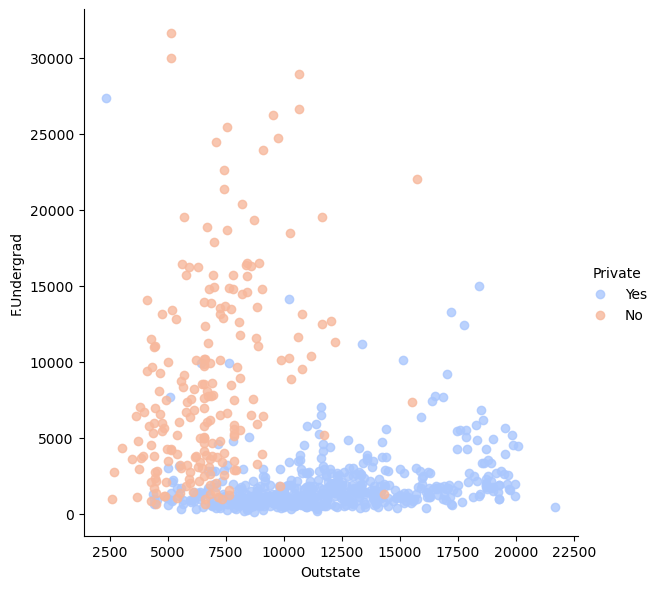

In [30]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=df, hue='Private', fit_reg=False,
          palette='coolwarm',height=6, aspect=1)

#### Stacked histogram showing Out of state Tuition based on the Private column

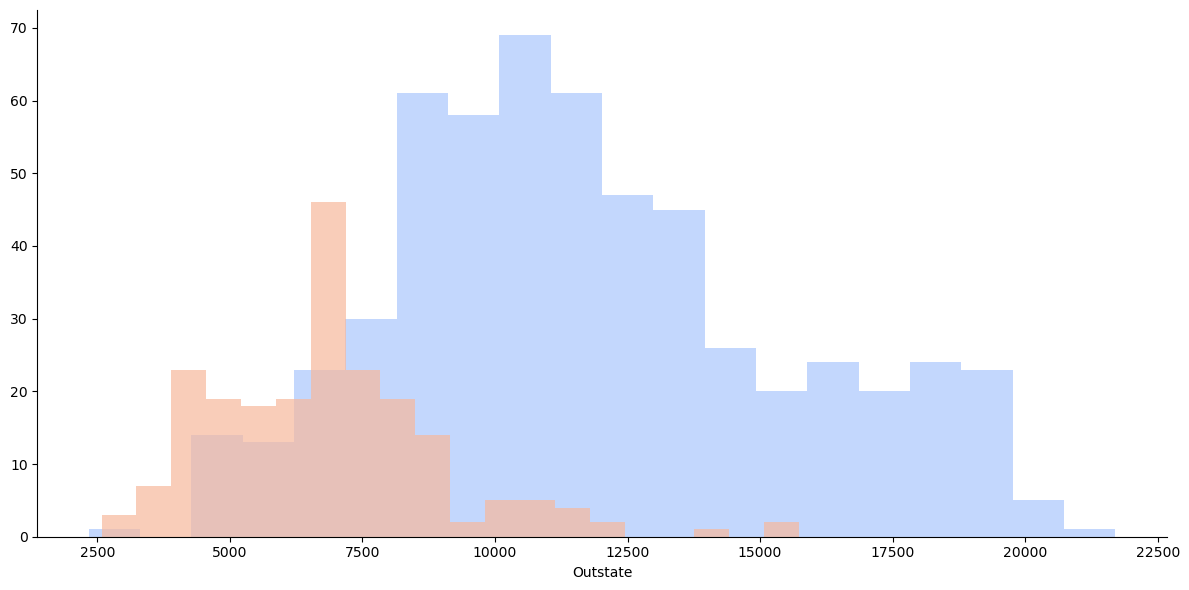

In [36]:
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
g=g.map(plt.hist,'Outstate', bins=20, alpha=0.7)

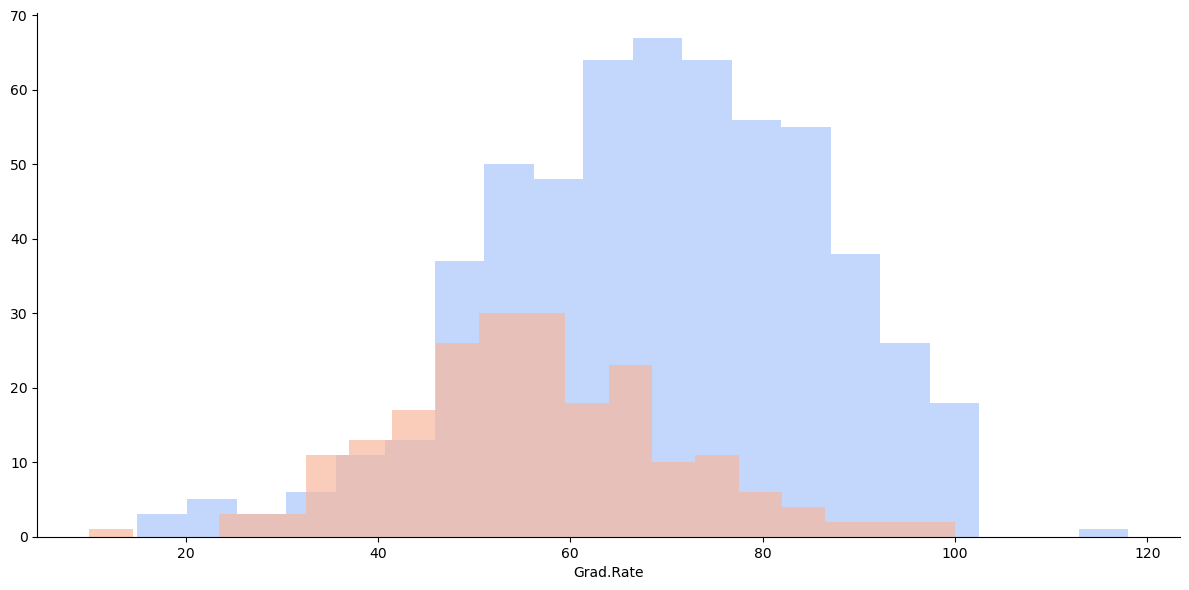

In [38]:
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
g=g.map(plt.hist,'Grad.Rate', bins=20, alpha=0.7)

#### Looks to be an error with a grad rate above 100%

In [42]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [44]:
df['Grad.Rate']['Cazenovia College']=100

/var/folders/rs/jpq917xx0cn4ry46vj9_th4m0000gn/T/ipykernel_3567/3480376862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College']=100


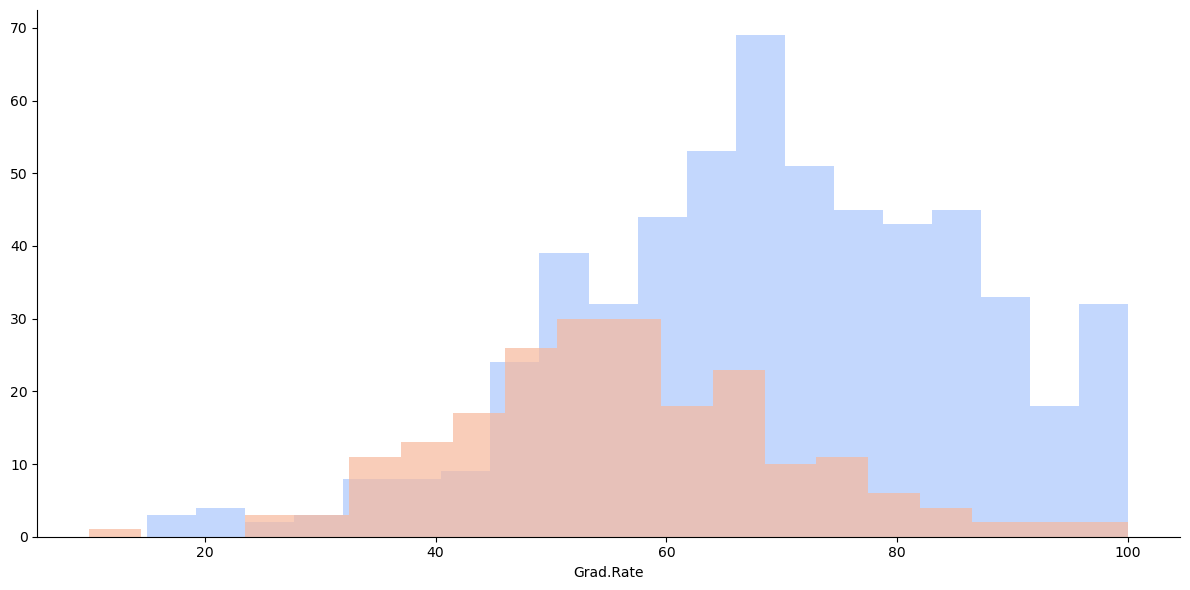

In [46]:
g = sns.FacetGrid(df, hue='Private', palette='coolwarm', height=6, aspect=2)
g=g.map(plt.hist,'Grad.Rate', bins=20, alpha=0.7)

#### K Means Cluster Creation

In [50]:
from sklearn.cluster import KMeans

In [52]:
KMeans = KMeans(n_clusters=2)

In [56]:
KMeans.fit(df.drop('Private', axis=1))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [58]:
KMeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

#### Evaluation - Creating a new column called 'Cluster' which is a 1 for Private school and a 0 for a public school

In [64]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0

In [70]:
df['Cluster'] = df['Private'].apply(converter)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


#### Create confusion matrix and classification report

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
print(confusion_matrix(df['Cluster'], KMeans.labels_))
print('\n')
print(classification_report(df['Cluster'],KMeans.labels_))

[[ 74 138]
 [ 34 531]]


              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



## Conclusion:
#### In this project, we explored and applied K-Means clustering to a dataset of college information. Here's a summary of the key steps and findings:

#### Data Import and Exploration:

#### Imported necessary libraries for data analysis and visualization.
#### Loaded the college dataset and set the first column as the index.
#### Conducted initial data exploration using the info and describe methods to understand the structure and statistics of the dataset.
#### Exploratory Data Analysis (EDA):

#### Created scatterplots to visualize relationships between various features, such as graduation rate vs. room and board costs, and out-of-state tuition vs. undergraduates.
#### Noted distinct patterns between private and public institutions, such as higher tuition and smaller student bodies in private colleges.
#### Handling Categorical Data:

#### Converted the purpose categorical column into dummy variables for modeling.
#### Data Standardization:

#### Standardized the features to ensure all variables are on a similar scale, which is crucial for clustering algorithms.
#### K-Means Clustering:

#### Applied the K-Means algorithm with two clusters, representing private and public institutions.
#### Evaluated the model by comparing the clustering results with the actual labels.
#### Evaluation:

#### Despite being an unsupervised learning method, we utilized the actual labels to evaluate the performance of the clustering algorithm.
#### Generated a confusion matrix and classification report to assess the precision and recall of the model. Although there were some misclassifications, the overall performance was reasonable given that the algorithm was based solely on feature similarities.
#### Business Implications:
#### As a business professional, it's important to recognize that while K-Means clustering can effectively group similar data points, the interpretability and application of these clusters depend heavily on domain knowledge. In this scenario, the clusters revealed significant differences between private and public colleges, such as tuition costs and student body size. This information can be used for targeted marketing, strategic planning, and improving service offerings tailored to the characteristics of each cluster. Further feature engineering and incorporating additional domain-specific knowledge can enhance the accuracy and utility of the clustering results.